# 2) Matching local regions

In [1]:
# libraries
import numpy as np
import cv2
from matplotlib import pyplot as plt


### A) find correspondences

In [2]:
from a4_utils import simple_descriptors
from my_utils import harris_points, helinger

def find_correspodences(descriptors1, descriptors2):
    correspondences = []
    for indx, desc1 in enumerate(descriptors1): # index and descriptor of p1
        dist = [(i,helinger(desc1,desc2)) for i,desc2 in enumerate(descriptors2)] # [(indx of p2, distance to p1), ...]
        nearest_point = min(dist, key=lambda x: x[1])[0] # index of nearest point to p1
        correspondences.append((indx,nearest_point))
    return correspondences


#check correctness of code
I = cv2.imread('data/graf/graf1.jpg')
points = harris_points(I, 9, 10000)
desc = simple_descriptors(I, points)
desc_for_shuffling = np.copy(desc)
np.random.shuffle(np.copy(desc_for_shuffling))
corr = find_correspodences(desc, desc_for_shuffling)
if [i for i,_ in corr] == [i for _,i in corr]:
    print('correspondence are identical for same points')

correspondence are identical for same points


B) visualize correspondences

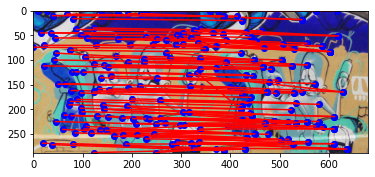

In [3]:
from a4_utils import display_matches, simple_descriptors

I1 = cv2.imread(f'data/graf/graf1_small.jpg')[0:289,0:340,:]
I2 = cv2.imread(f'data/graf/graf2_small.jpg')

harris_points_for_Is = [harris_points(I, 3, 1000) for I in [I1,I2]]
descs = [simple_descriptors(I,ps) for I,ps in zip([I1,I2],harris_points_for_Is)]
corr = find_correspodences(descs[0], descs[1])
display_matches(I1, I2, harris_points_for_Is[0], harris_points_for_Is[1], corr)

In [4]:
def find_correspodences_symetric(I1, descriptors1, I2, descriptors2):
    correspondences_1to2 = dict()
    correspondences_2to1 = dict()

    # get best fit correspondences from im1 to im2
    for indx, desc1 in enumerate(descriptors1):
        dist = [(i,helinger(desc1,desc2)) for i,desc2 in enumerate(descriptors2)]
        nearest_point = min(dist, key=lambda x: x[1])[0]
        correspondences_1to2[indx] = nearest_point

    # get best fit correspondences from im2 to im1
    for indx, desc2 in enumerate(descriptors2):
        dist = [(i,helinger(desc1,desc2)) for i,desc1 in enumerate(descriptors1)]
        nearest_point = min(dist, key=lambda x: x[1])[0]
        correspondences_2to1[indx] = nearest_point

    #return these correspondeces which are via versa
    return [(i1,i2) for i1,i2 in correspondences_1to2.items() if correspondences_2to1[i2] == i1]

def find_matches(I1, I2):
    sigma = 6
    threshold = 10000
    ps1 = harris_points(I1, sigma, threshold)
    ps2 = harris_points(I2,sigma,threshold)
    desc1 = simple_descriptors(I1, ps1)
    desc2 = simple_descriptors(I2, ps2)
    corr = find_correspodences_symetric(I1,desc1,I2,desc2)
    return ps1, ps2, corr

I1 = cv2.imread(f'data/graf/graf1_small.jpg')[0:289,0:340,:] # make the size same
I2 = cv2.imread(f'data/graf/graf2_small.jpg')

ps1, ps2, corr = find_matches(I1,I2)
display_matches(I1, I2, ps1, ps2, corr)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/vita/School/7/MaschinePerception/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-5f79d1a3565a>", line 33, in <module>
    ps1, ps2, corr = find_matches(I1,I2)
  File "<ipython-input-4-5f79d1a3565a>", line 25, in find_matches
    desc1 = simple_descriptors(I1, ps1)
  File "/home/vita/School/7/MaschinePerception/assignment4/a4_utils.py", line 42, in simple_descriptors
    a[int(m), int(l)] += 1
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/vita/School/7/MaschinePerception/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2064, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exception, another 

TypeError: object of type 'NoneType' has no len()

**Question**: What do you notice when visualizing the correspondences? How robust
are the matches?

Answer: more robust than the nonsymetrical one